# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import seaborn as sns
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [32]:
#Take a look at the dataset first
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


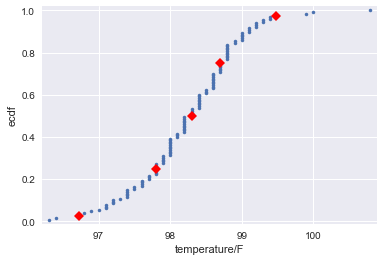

In [48]:
#plot the ecdf 
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/ n
    return x,y

x,y=ecdf(df['temperature'])
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('temperature/F')
_=plt.ylabel('ecdf')
plt.margins(0.02)

#Compare the percentile to ecdf
percentile=[2.5,25,50,75,97.5]
p_temp=np.percentile(df['temperature'],percentile)
p_temp
_ = plt.plot(p_temp, np.array(percentile)/100,marker='D', color='red',
         linestyle='none')
plt.show()

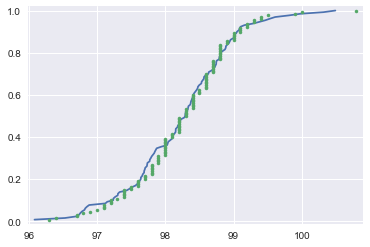

In [49]:
#Check the mean and std

mean_temp=np.mean(df['temperature'])
std_temp=np.std(df['temperature'])


#Sample out a normal distribution with the parameters
samples=np.random.normal(mean_temp,std_temp,size=130)
x_norm,y_norm=ecdf(samples)

#Now compare the cdf and the actual distribution ecdf
_ = plt.plot(x_norm, y_norm)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.show()

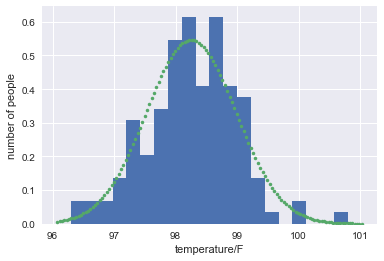

In [45]:
#temperature should be discrete data so I'm using histogram to see the distribution
#It seems like a normal distribution at first glance but it's neccessary to validate
_=plt.hist(df['temperature'],bins=20,normed=True)
_=plt.xlabel('temperature/F')
_=plt.ylabel('number of people')

#plot the pdf of normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 130)
p = norm.pdf(x, mean_temp, std_temp)
plt.plot(x, p, '.', linewidth=2)

plt.show()

In [ ]:
#This plot shows the distribution of body temperature is normal.
#Sample size n=130 is large enough. The obeservations are independent.


In [85]:
#One-sample test: take 98.6F as the test statistic. That means we shift all data in df such that the mean is 98.6
trans_mean=df['temperature']- mean_temp + 98.6
bs_replicates=draw_bs_reps(trans_mean,np.mean,130)
#Calculate the p-value
p=np.sum(bs_replicates <= mean_temp)/130
p

0.0

In [68]:
#Now try two-sample test
#We've already calculated the mean_temp before
#Shift both two samples 
trans1_mean=df['temperature']- mean_temp + 98.6
trans2_mean=df['temperature']- mean_temp + mean_temp

bs_replicates_1 = draw_bs_reps(trans1_mean, np.mean, 130)
bs_replicates_2 = draw_bs_reps(trans2_mean, np.mean,130)

bs_replicates = bs_replicates_1 - bs_replicates_2

# Compute and print p-value: p
p = np.sum(bs_replicates>=mean_temp) / 130
p

0.0

In [ ]:
#p-value is small enough for both one-sample and two-sample tests

In [55]:
z_critical = norm.ppf(q = 0.975) 

In [64]:
#Calculate the margin of error using z=std/sqrt(size of sample)
margin_of_error=1.96*std_temp/(np.sqrt(130))

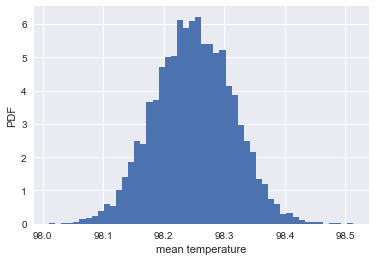

In [8]:
#Calculate confidence interval
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data,func,size=1):
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func)
    return bs_replicates

bs_replicates=draw_bs_reps(df['temperature'],np.mean,size=10000)
sem=np.std(df['temperature'])/np.sqrt(len(df['temperature']))
bs_std=np.std(bs_replicates)

_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean temperature')
_ = plt.ylabel('PDF')
plt.show()

In [100]:

np.percentile(bs_replicates,[2.5,97.5])

#temperatures outside this range would be considered 'abnormal'


array([ 98.45226923,  98.74082692])

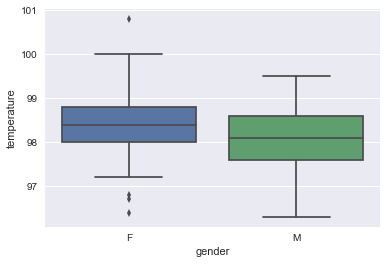

(98.39384615384613, 98.1046153846154)

In [80]:
#Plot to see outliers for each gender
np.percentile(df['temperature'],[25,50,75])
_=sns.boxplot(x='gender',y='temperature',data=df)
_=plt.xlabel('gender')
_=plt.ylabel('temperature')
plt.show()



In [96]:
#Use one-sample test
#Mean of each gender
f=df[df['gender'] == 'F']
f_mean=np.mean(f.temperature)
m=df[df['gender'] == 'M']
m_mean=np.mean(m.temperature)

In [98]:
#Shift male mean to the mean of the female
m_trans= m['temperature'] - m_mean + f_mean

bs_replicates_m = draw_bs_reps(m_trans, np.mean, 65)

# Compute and print p-value: p
p = np.sum(bs_replicates_m >= (m_mean-f_mean)) / 65
p

1.0

In [101]:
#Conclusion
#From the analysis we got answers to the questions at first
#1. Based on comparision of PDF and normal distribution plot, it's easy to conclude the data of human temperature
#is normally distributed

#2. The size of dataset is big enough and observations are independent

#3. According to this dataset, the mean of temperature is 98.2F. Comparing to 98.6F, p-value is small enough for us to
#reject the null hypothesis.
#4. Temperatures outside the range of [98.45226923,  98.74082692] should be considered abnormal
#5. Female mean temperature at each percentile is higher than male. With more outliers female temperature has larger
#variance than male.